<h1><center>COMS7047A A1: Linear Regression</center></h1> 

<img src="./img/wits_logo.png" alt="Wits_Logo" style="width: 400px;"/>

***
<h4><center> Samantha Ball  &nbsp;   1603701   &nbsp;  March 2021</center></h4>

In [59]:
#----INSTALL LIBRARIES----#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## Data Import
The chosen dataset involves factors affecting medical insurance costs where costs are predicted based on variables such as *age, sex, bmi, children, smoker, region* and *charges*. 

In [60]:
#----IMPORT DATA----#
data_path = "./data/insurance.csv" # data given in CSV format
df = pd.read_csv(data_path) #read in data

pd.set_option('display.max_columns', None) #show all columns
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preparation

In [61]:
#----IMPUTE MISSING VALUES----#

#Find number of missing data entries in each column
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

age
False    1338
Name: age, dtype: int64

sex
False    1338
Name: sex, dtype: int64

bmi
False    1338
Name: bmi, dtype: int64

children
False    1338
Name: children, dtype: int64

smoker
False    1338
Name: smoker, dtype: int64

region
False    1338
Name: region, dtype: int64

charges
False    1338
Name: charges, dtype: int64



No missing values found therefore no imputation needed.

## Data Exploration

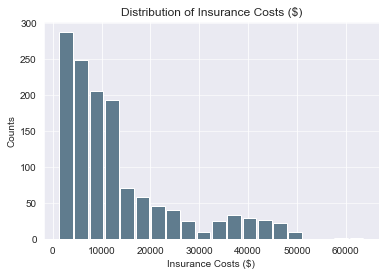

In [62]:
#----DATA EXPLORATION----#

#Visualise target variable: insurance costs (charges)
df["charges"].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of Insurance Costs ($)')
plt.ylabel('Counts')
plt.xlabel('Insurance Costs ($)')
plt.grid(axis='y', alpha=0.75)

### Continuous Variables

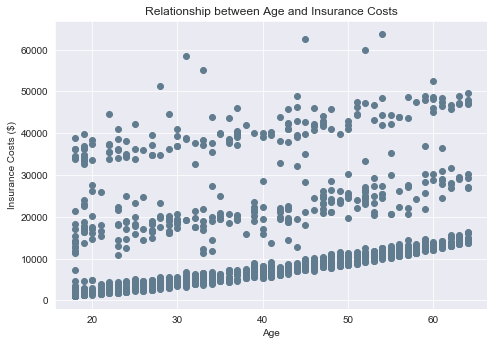

In [63]:
#Relationship between charges and age
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["age"], df["charges"], color='#607c8e')
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age and Insurance Costs')
plt.show()

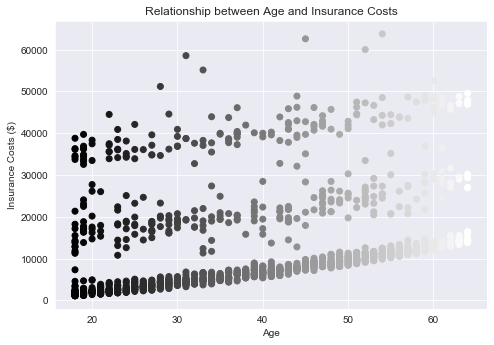

In [64]:
#Relationship between charges and age
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
#ax.scatter(df["age"], df["charges"], color='#607c8e')
ax.scatter(df["age"], df["charges"], c=df["age"], cmap='gray')
ax.set_xlabel('Age')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Age and Insurance Costs')
plt.show()

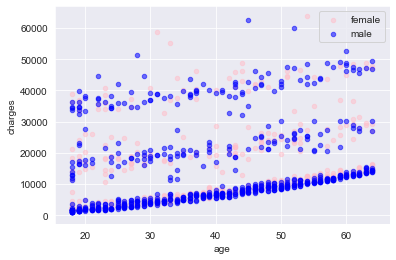

In [65]:
fig, ax = plt.subplots()
colors = {'female':'pink', 'male':'blue'}

grouped = df.groupby('sex')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='age', y='charges', label=key, color=colors[key], alpha=0.55)

plt.show()

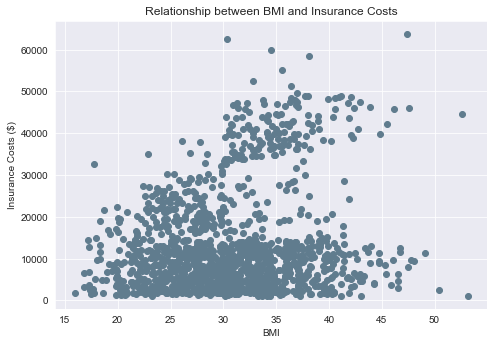

In [66]:
#Relationship between charges and bmi
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["bmi"], df["charges"], color='#607c8e')
ax.set_xlabel('BMI')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between BMI and Insurance Costs')
plt.show()

### Categorical Variables

Text(0.5, 1.0, 'Relationship between No. of Dependents and Insurance Costs')

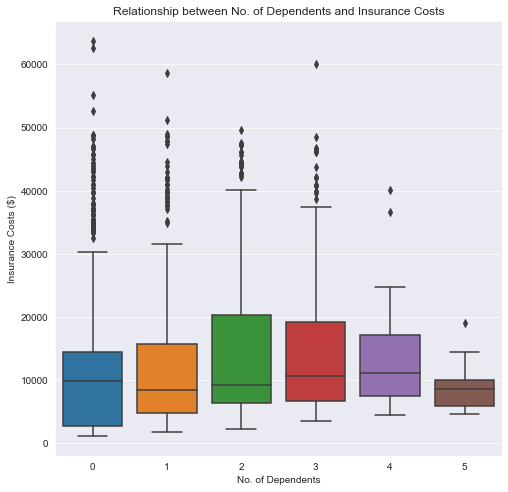

In [80]:
#Relationship between charges and children -> change colours/make more uniform??
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="children", y="charges", data=df)
ax.set_xlabel('No. of Dependents')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between No. of Dependents and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Sex and Insurance Costs')

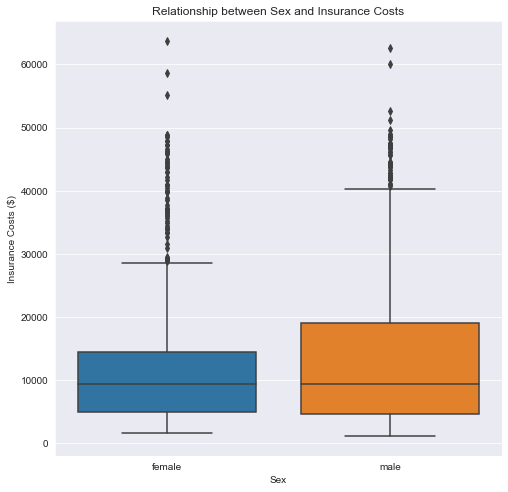

In [79]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="sex", y="charges", data=df)
ax.set_xlabel('Sex')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Sex and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Region and Insurance Costs')

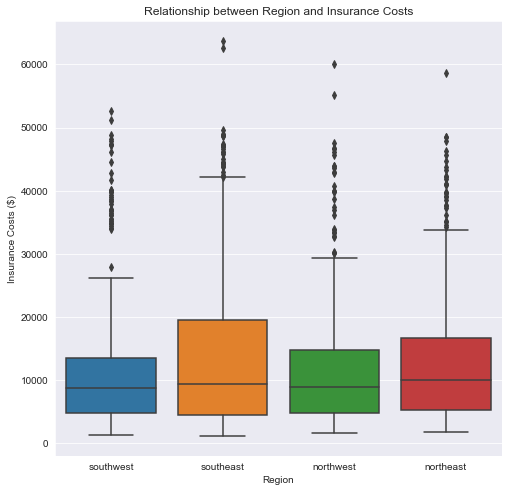

In [78]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="region", y="charges", data=df)
ax.set_xlabel('Region')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Region and Insurance Costs')

Text(0.5, 1.0, 'Relationship between Smoking and Insurance Costs')

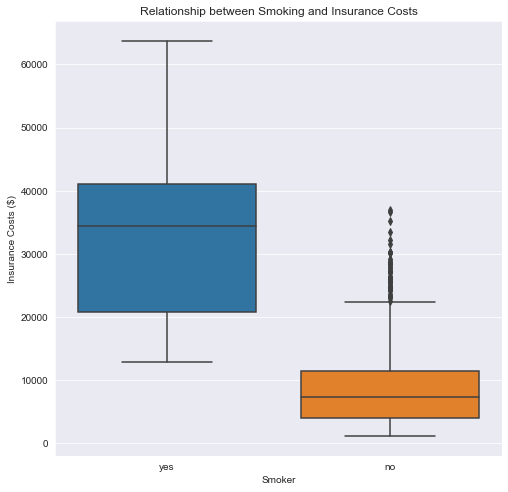

In [77]:
f, ax = plt.subplots(figsize= (8, 8))
sns.boxplot(x="smoker", y="charges", data=df)
ax.set_xlabel('Smoker')
ax.set_ylabel('Insurance Costs ($)')
ax.set_title('Relationship between Smoking and Insurance Costs')

A clear correlation between smoking and increased medical costs can be observed from the contrast in distributions.

## 1. Implementation of Basic Linear Regression

In [71]:
#----BASIC LINEAR REGRESSION----#

## 2. Effects of Different Learning Rates

In [72]:
#----EFFECT OF DIFFERENT LEARNING RATES ON COVERGENCE---#

## 3. Improved Learning

In [73]:
#----FEATURE SCALING----#
# visualise outcome of each

In [74]:
#----FEATURE STANDARDISATION----#

In [75]:
#----REGULARISATION----# 
# try different ones

## 4. Additional Visualisations